In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df = pd.read_csv('data/clean/cleaned_data.csv')

# analyse des tendances global

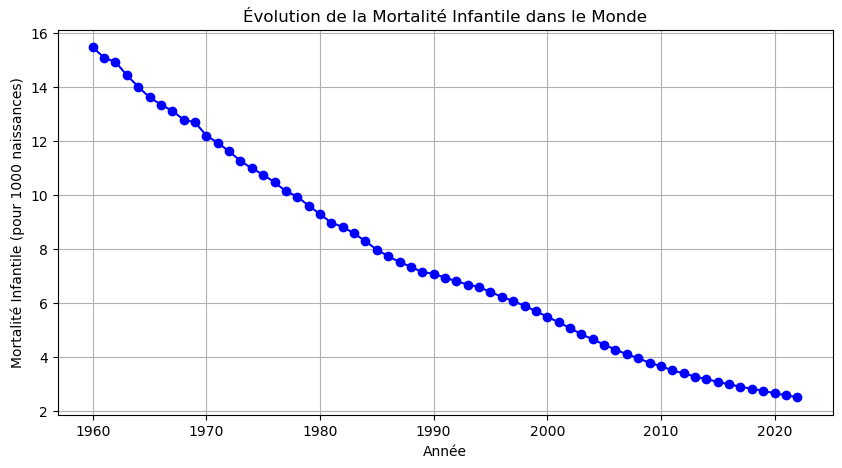

In [96]:

global_trend = df.groupby('Year')['Child Mortality'].mean()
plt.figure(figsize=(10, 5))
plt.plot(global_trend.index, global_trend.values, marker='o', linestyle='-', color='b')
plt.xlabel('Année')
plt.ylabel('Mortalité Infantile (pour 1000 naissances)')
plt.title('Évolution de la Mortalité Infantile dans le Monde')
plt.grid()
plt.show()

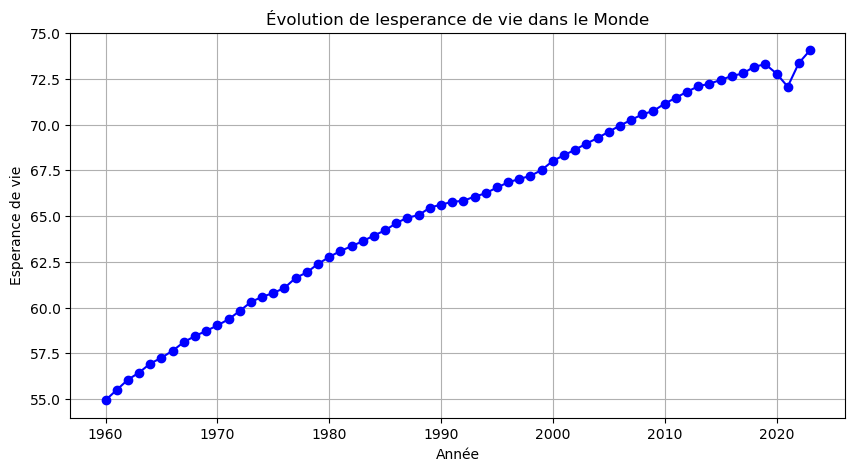

In [97]:
global_trend = df.groupby('Year')['Life Expectancy'].mean()
plt.figure(figsize=(10, 5))
plt.plot(global_trend.index, global_trend.values, marker='o', linestyle='-', color='b')
plt.xlabel('Année')
plt.ylabel('Esperance de vie')
plt.title('Évolution de lesperance de vie dans le Monde')
plt.grid()
plt.show()

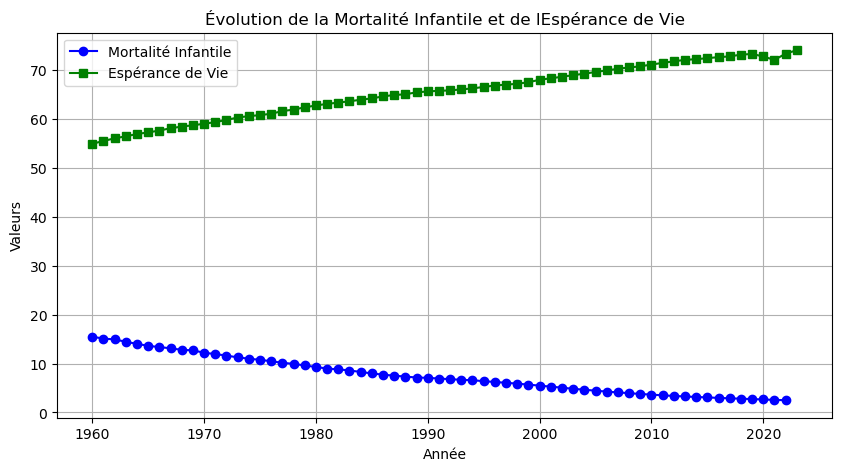

In [ ]:
global_mortality_trend = df.groupby('Year')['Child Mortality'].mean()
global_life_expectancy_trend = df.groupby('Year')['Life Expectancy'].mean()

plt.figure(figsize=(10, 5))
plt.plot(global_mortality_trend.index, global_mortality_trend.values, marker='o', linestyle='-', color='b', label='Mortalité Infantile')
plt.plot(global_life_expectancy_trend.index, global_life_expectancy_trend.values, marker='s', linestyle='-', color='g', label='Espérance de Vie')
plt.xlabel('Année')
plt.ylabel('Valeurs')
plt.title('Évolution de la Mortalité Infantile et de lEspérance de Vie')
plt.legend()
plt.grid()
plt.show()

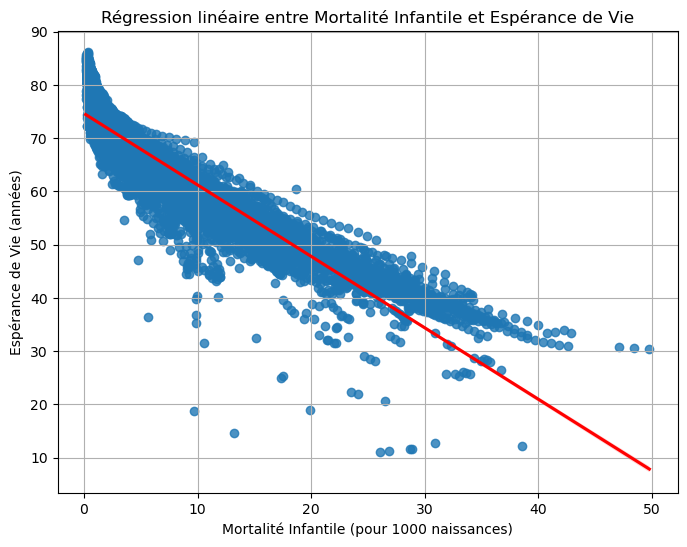

In [99]:
plt.figure(figsize=(8, 6))
sns.regplot(x=df['Child Mortality'], y=df['Life Expectancy'], scatter_kws={'alpha':0.8}, line_kws={'color':'red'})
plt.xlabel('Mortalité Infantile (pour 1000 naissances)')
plt.ylabel('Espérance de Vie (années)')
plt.title('Régression linéaire entre Mortalité Infantile et Espérance de Vie')
plt.grid()
plt.show()

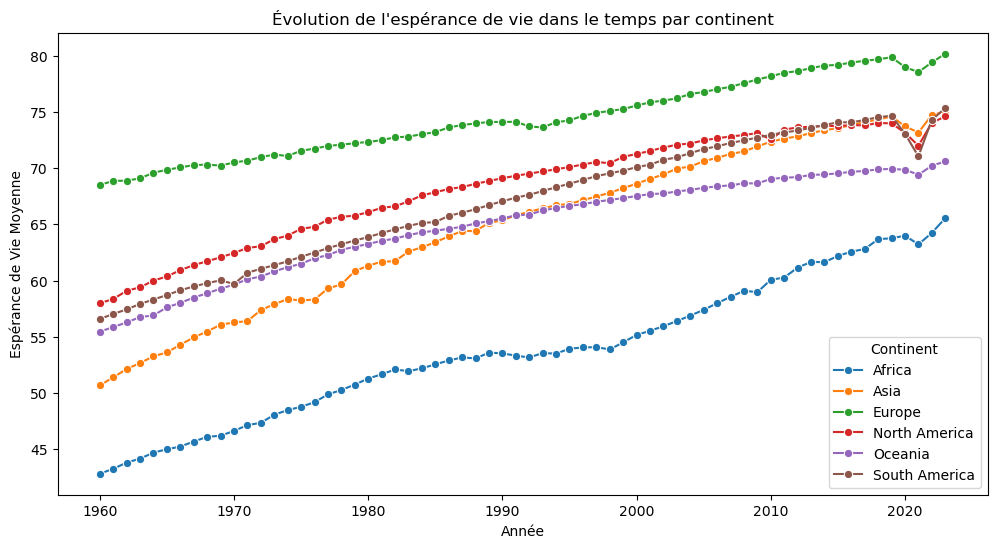

In [100]:
# Dictionnaire associant chaque pays à son continent
continent_map = {
    "Africa": ["Algeria", "Angola", "Benin", "Botswana", "Burkina Faso", "Burundi", "Cameroon", "Cape Verde", "Central African Republic", 
               "Chad", "Comoros", "Congo", "Djibouti", "Egypt", "Equatorial Guinea", "Eritrea", "Eswatini", "Ethiopia", "Gabon", "Gambia", 
               "Ghana", "Guinea", "Guinea-Bissau", "Ivory Coast", "Kenya", "Lesotho", "Liberia", "Libya", "Madagascar", "Malawi", "Mali", 
               "Mauritania", "Mauritius", "Morocco", "Mozambique", "Namibia", "Niger", "Nigeria", "Rwanda", "Sao Tome and Principe", 
               "Senegal", "Seychelles", "Sierra Leone", "Somalia", "South Africa", "South Sudan", "Sudan", "Tanzania", "Togo", "Tunisia", 
               "Uganda", "Zambia", "Zimbabwe"],

    "Asia": ["Afghanistan", "Armenia", "Azerbaijan", "Bahrain", "Bangladesh", "Bhutan", "Brunei", "Cambodia", "China", "Georgia", "India", 
             "Indonesia", "Iran", "Iraq", "Israel", "Japan", "Jordan", "Kazakhstan", "Kuwait", "Kyrgyzstan", "Laos", "Lebanon", "Malaysia", 
             "Maldives", "Mongolia", "Myanmar", "Nepal", "North Korea", "Oman", "Pakistan", "Palestine", "Philippines", "Qatar", "Saudi Arabia", 
             "Singapore", "South Korea", "Sri Lanka", "Syria", "Tajikistan", "Thailand", "Timor-Leste", "Turkey", "Turkmenistan", "United Arab Emirates", 
             "Uzbekistan", "Vietnam", "Yemen"],

    "Europe": ["Albania", "Andorra", "Austria", "Belarus", "Belgium", "Bosnia and Herzegovina", "Bulgaria", "Croatia", "Cyprus", "Czech Republic", 
               "Denmark", "Estonia", "Finland", "France", "Germany", "Greece", "Hungary", "Iceland", "Ireland", "Italy", "Latvia", "Liechtenstein", 
               "Lithuania", "Luxembourg", "Malta", "Moldova", "Monaco", "Montenegro", "Netherlands", "North Macedonia", "Norway", "Poland", "Portugal", 
               "Romania", "Russia", "San Marino", "Serbia", "Slovakia", "Slovenia", "Spain", "Sweden", "Switzerland", "Ukraine", "United Kingdom", 
               "Vatican City"],

    "North America": ["Antigua and Barbuda", "Bahamas", "Barbados", "Belize", "Canada", "Costa Rica", "Cuba", "Dominica", "Dominican Republic", "El Salvador", 
                      "Grenada", "Guatemala", "Haiti", "Honduras", "Jamaica", "Mexico", "Nicaragua", "Panama", "Saint Kitts and Nevis", "Saint Lucia", 
                      "Saint Vincent and the Grenadines", "Trinidad and Tobago", "United States"],

    "South America": ["Argentina", "Bolivia", "Brazil", "Chile", "Colombia", "Ecuador", "Guyana", "Paraguay", "Peru", "Suriname", "Uruguay", "Venezuela"],

    "Oceania": ["Australia", "Fiji", "Kiribati", "Marshall Islands", "Micronesia", "Nauru", "New Zealand", "Palau", "Papua New Guinea", "Samoa", 
                "Solomon Islands", "Tonga", "Tuvalu", "Vanuatu"]
}

# Fonction pour attribuer un continent à un pays
def get_continent(country):
    for continent, countries in continent_map.items():
        if country in countries:
            return continent
    return "Other"  # Si le pays n'est pas dans notre liste

# Ajouter la colonne "Continent"
df["Continent"] = df["Country"].apply(get_continent)

# Supprimer les données non classées ("Other")
df = df[df["Continent"] != "Other"]

# Grouper par année et continent pour obtenir la moyenne de l'espérance de vie
df_continent = df.groupby(["Year", "Continent"])["Life Expectancy"].mean().reset_index()

# Tracer l'évolution de l'espérance de vie par continent
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_continent, x="Year", y="Life Expectancy", hue="Continent", marker="o")

# Personnalisation du graphique
plt.title("Évolution de l'espérance de vie dans le temps par continent")
plt.xlabel("Année")
plt.ylabel("Espérance de Vie Moyenne")
plt.legend(title="Continent")
plt.show()


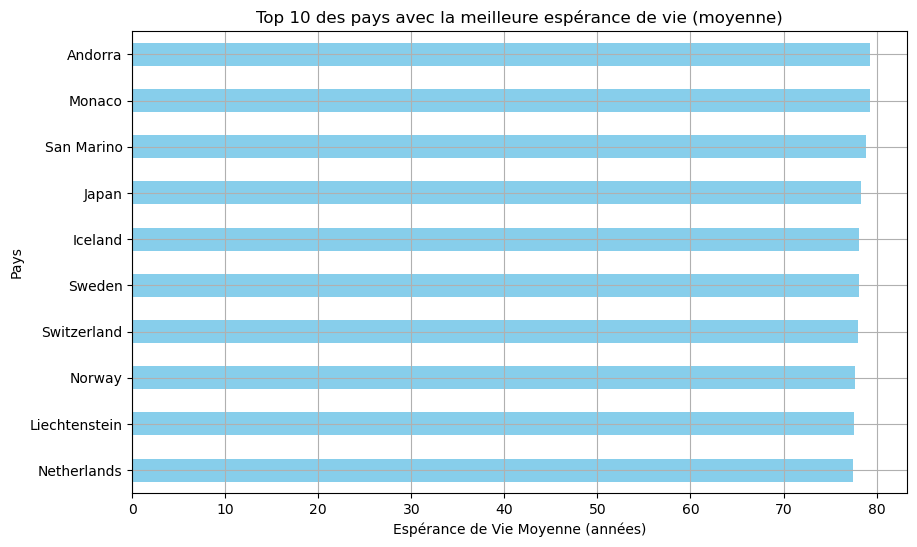

In [101]:
top_countries = df.groupby('Country')['Life Expectancy'].mean().nlargest(10)

plt.figure(figsize=(10, 6))
top_countries.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Espérance de Vie Moyenne (années)')
plt.ylabel('Pays')
plt.title('Top 10 des pays avec la meilleure espérance de vie (moyenne)')
plt.grid()
plt.show()


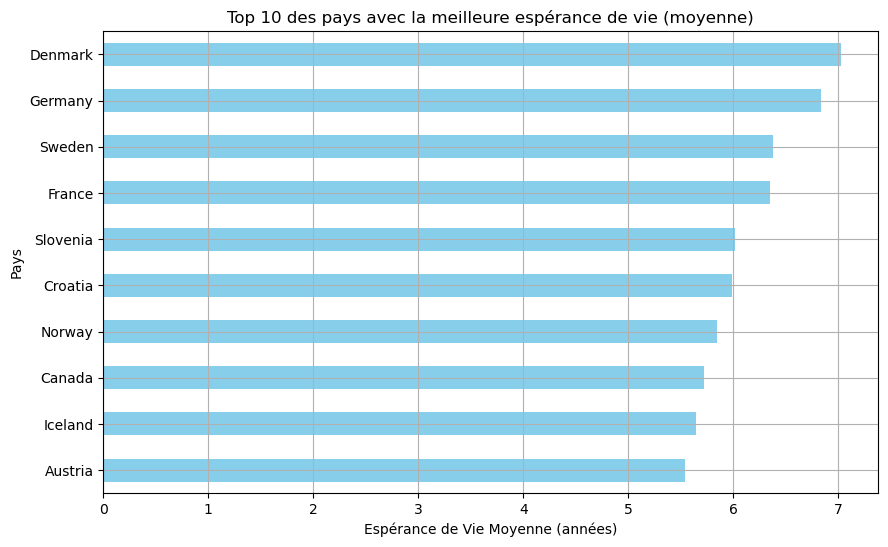

In [102]:
top_countries = df.groupby('Country')['Health Expenditure'].mean().nlargest(10)

plt.figure(figsize=(10, 6))
top_countries.sort_values().plot(kind='barh', color='skyblue')
plt.xlabel('Espérance de Vie Moyenne (années)')
plt.ylabel('Pays')
plt.title('Top 10 des pays avec la meilleure espérance de vie (moyenne)')
plt.grid()
plt.show()


## Impact du Développement Économique sur la Santé

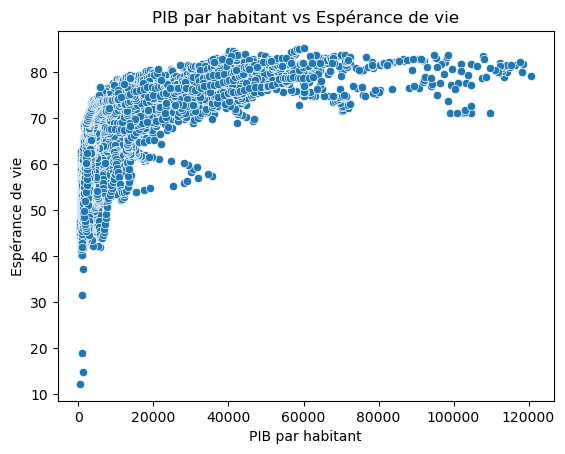

In [103]:
sns.scatterplot(x='GDP per Capita', y='Life Expectancy', data=df)
plt.title("PIB par habitant vs Espérance de vie")
plt.xlabel("PIB par habitant")
plt.ylabel("Espérance de vie")
plt.show()

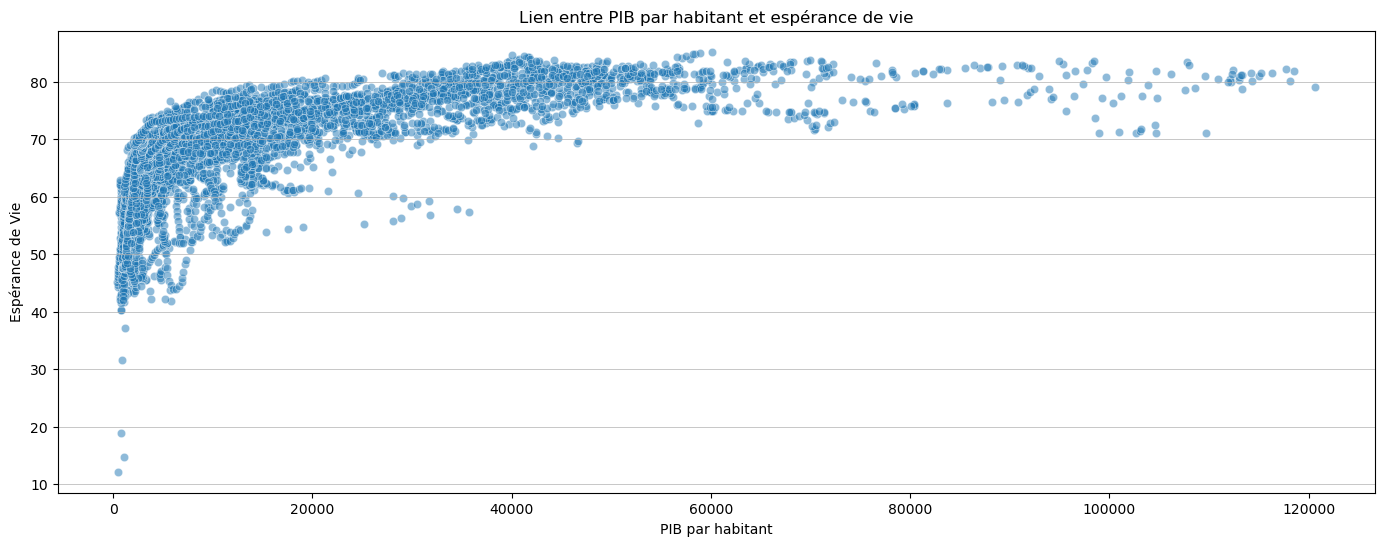

In [104]:
plt.figure(figsize=(17, 6))
sns.scatterplot(data=df, x="GDP per Capita", y="Life Expectancy", alpha=0.5)
#plt.xscale("log")  # Échelle logarithmique pour mieux visualiser la relation
plt.title("Lien entre PIB par habitant et espérance de vie")
plt.grid(axis='y', linewidth=0.5)
plt.xlabel("PIB par habitant")
plt.ylabel("Espérance de Vie")
plt.show()

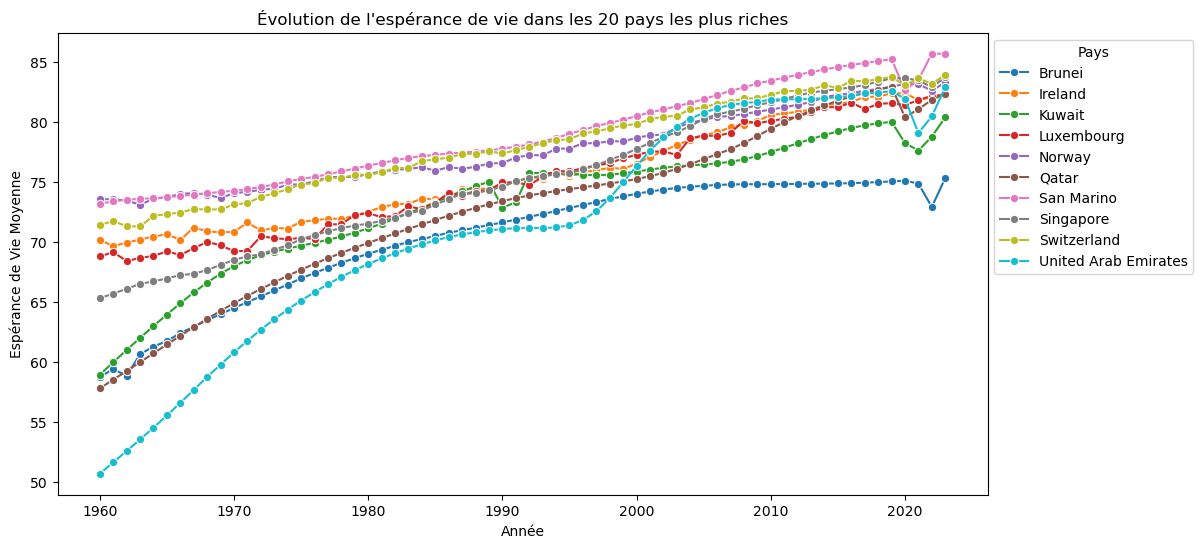

In [105]:
top_20_countries = df.groupby("Country")["GDP per Capita"].mean().nlargest(10).index
df_top_20_time = df[df["Country"].isin(top_20_countries)]

# Graphique en ligne
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_20_time, x="Year", y="Life Expectancy", hue="Country", marker="o", palette="tab10")

# Personnalisation
plt.title("Évolution de l'espérance de vie dans les 20 pays les plus riches")
plt.xlabel("Année")
plt.ylabel("Espérance de Vie Moyenne")
plt.legend(title="Pays", bbox_to_anchor=(1, 1))
plt.show()


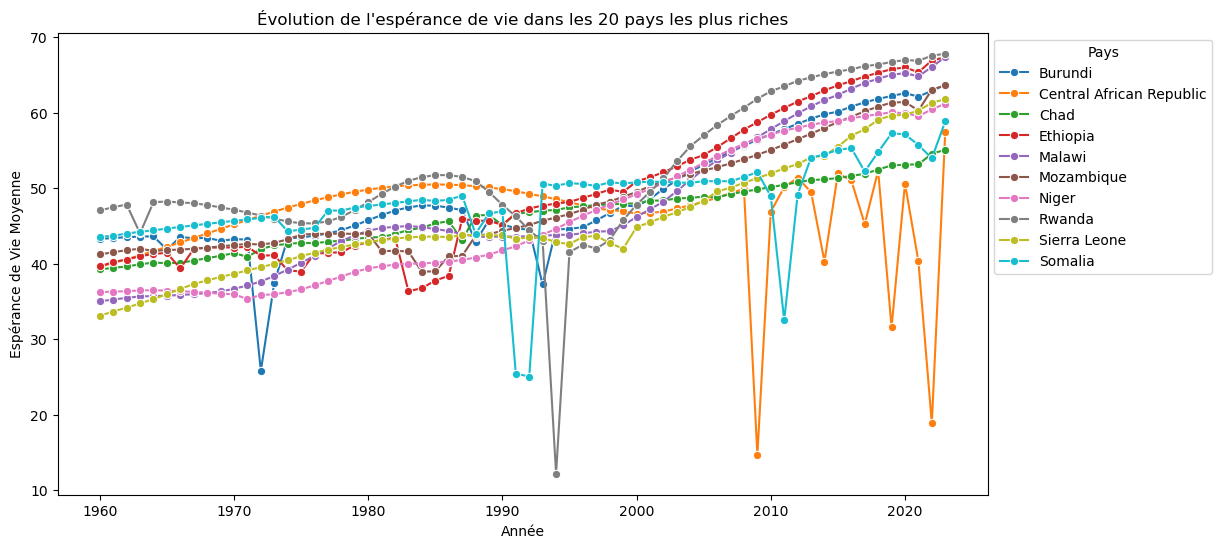

In [106]:
top_20_countries = df.groupby("Country")["GDP per Capita"].mean().nsmallest(10).index
df_top_20_time = df[df["Country"].isin(top_20_countries)]

# Graphique en ligne
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_top_20_time, x="Year", y="Life Expectancy", hue="Country", marker="o", palette="tab10")

# Personnalisation
plt.title("Évolution de l'espérance de vie dans les 20 pays les plus riches")
plt.xlabel("Année")
plt.ylabel("Espérance de Vie Moyenne")
plt.legend(title="Pays", bbox_to_anchor=(1, 1))
plt.show()

/var/folders/d5/3pj_jfd14g3bdvwpbbc8wt5r0000gn/T/ipykernel_19583/3694509856.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/d5/3pj_jfd14g3bdvwpbbc8wt5r0000gn/T/ipykernel_19583/3694509856.py:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/d5/3pj_jfd14g3bdvwpbbc8wt5r0000gn/T/ipykernel_19583/3694509856.py:25: UserWarning:

set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.



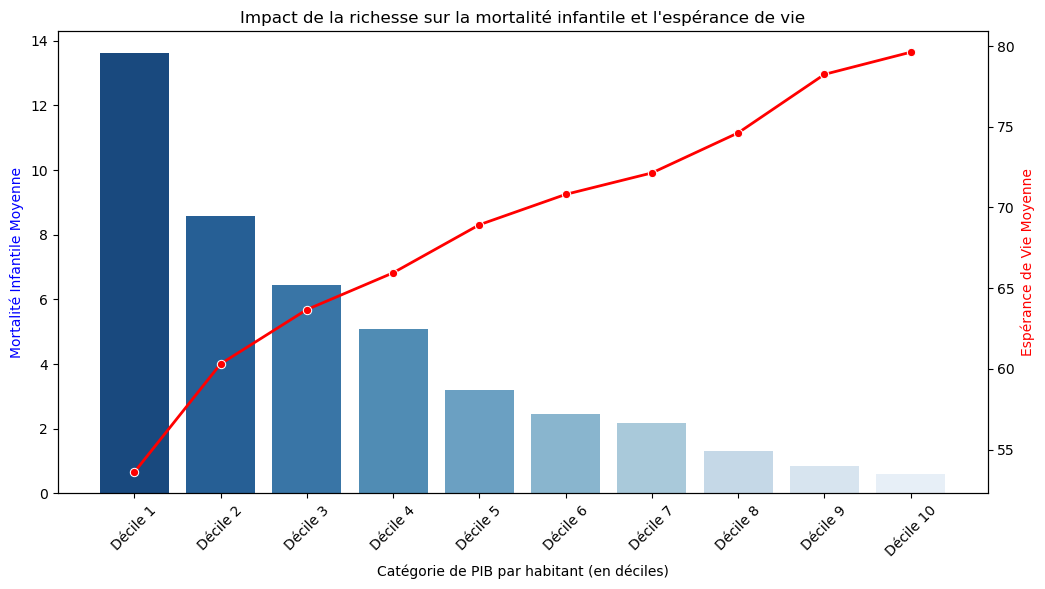

In [107]:
# Créer des catégories de PIB (10 déciles pour plus de détail)
df["GDP Category"] = pd.qcut(df["GDP per Capita"], q=10, labels=[f"Décile {i+1}" for i in range(10)])

# Calculer la mortalité infantile moyenne et l'espérance de vie moyenne par catégorie de PIB
df_gdp_analysis = df.groupby("GDP Category").agg({
    "Child Mortality": "mean",
    "Life Expectancy": "mean"
}).reset_index()

# Création d'un graphique combiné (Mortalité infantile et Espérance de vie)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Barplot pour la mortalité infantile
sns.barplot(data=df_gdp_analysis, x="GDP Category", y="Child Mortality", palette="Blues_r", ax=ax1)
ax1.set_ylabel("Mortalité Infantile Moyenne", color="blue")

# Création d'un second axe pour l'espérance de vie
ax2 = ax1.twinx()
sns.lineplot(data=df_gdp_analysis, x="GDP Category", y="Life Expectancy", marker="o", color="red", linewidth=2, ax=ax2)
ax2.set_ylabel("Espérance de Vie Moyenne", color="red")

# Personnalisation
ax1.set_xlabel("Catégorie de PIB par habitant (en déciles)")
ax1.set_title("Impact de la richesse sur la mortalité infantile et l'espérance de vie")
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)

plt.show()


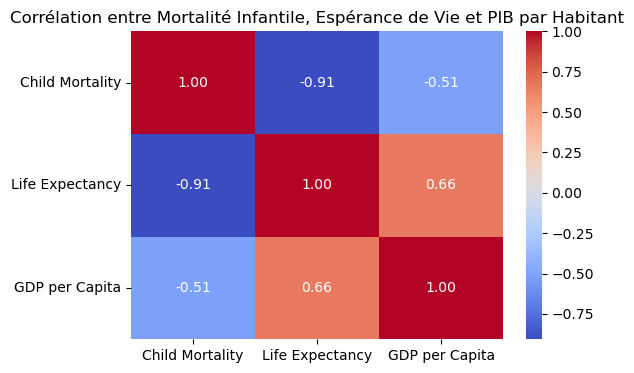

In [108]:
df_filtered = df[['Child Mortality', 'Life Expectancy', 'GDP per Capita']].dropna()

# Calculer la matrice de corrélation
correlation_matrix = df_filtered.corr()

# Afficher la matrice de corrélation
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Corrélation entre Mortalité Infantile, Espérance de Vie et PIB par Habitant")
plt.show()

## Impact des Infrastructures Médicales

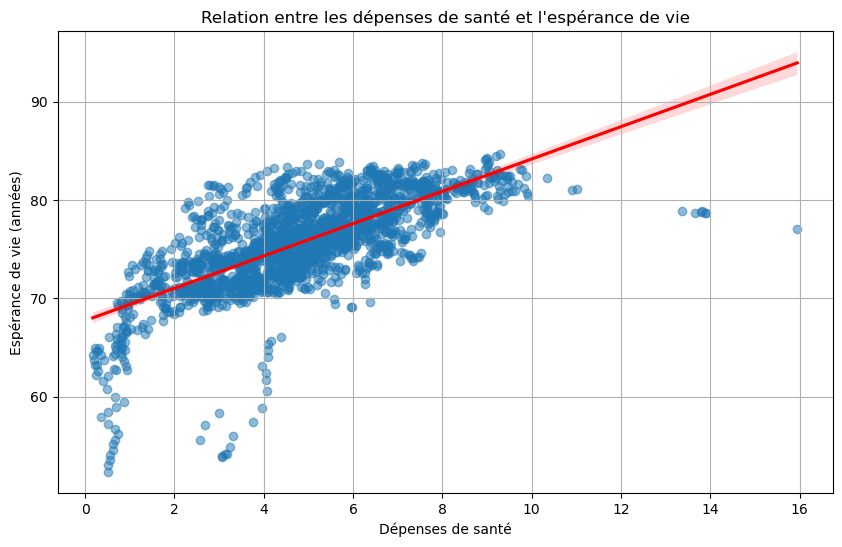

In [109]:

# Filtrer les données valides
df_filtered = df[['Health Expenditure', 'Life Expectancy']].dropna()

# Créer le scatter plot avec une régression
plt.figure(figsize=(10,6))
sns.regplot(x=df_filtered['Health Expenditure'], y=df_filtered['Life Expectancy'], scatter_kws={'alpha':0.5}, line_kws={"color":"red"})

plt.xlabel("Dépenses de santé")
plt.ylabel("Espérance de vie (années)")
plt.title("Relation entre les dépenses de santé et l'espérance de vie")
plt.grid(True)
plt.show()


/var/folders/d5/3pj_jfd14g3bdvwpbbc8wt5r0000gn/T/ipykernel_19583/2739763260.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




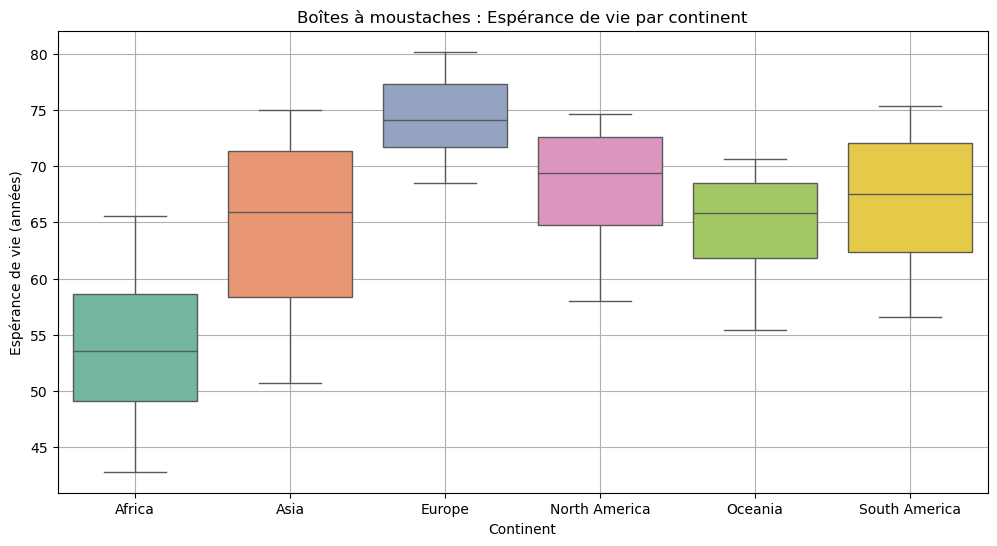

In [110]:
if {'Continent', 'Life Expectancy'}.issubset(df_continent.columns):

    # Créer le boxplot par continent
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df_continent, x="Continent", y="Life Expectancy", palette="Set2")

    # Paramètres du graphique
    plt.xlabel("Continent")
    plt.ylabel("Espérance de vie (années)")
    plt.title("Boîtes à moustaches : Espérance de vie par continent")
    plt.grid(True)
    plt.show()

/var/folders/d5/3pj_jfd14g3bdvwpbbc8wt5r0000gn/T/ipykernel_19583/3067652461.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




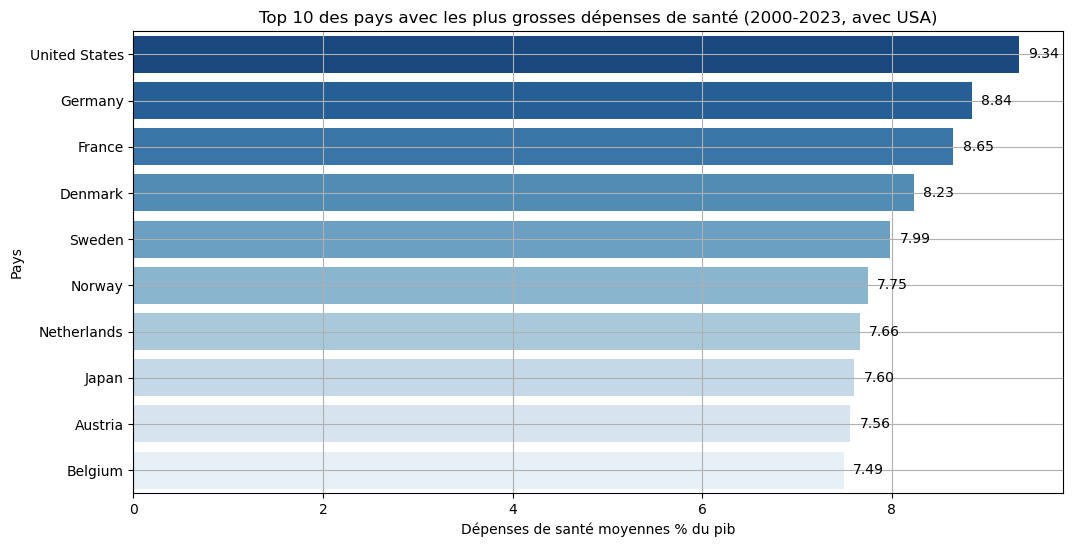

In [111]:


# Vérifier la présence des colonnes nécessaires
if {'Health Expenditure', 'Country', 'Year'}.issubset(df.columns):

    # Filtrer les données de 2010 à 2020
    df_filtered = df[(df["Year"] >= 2000) & (df["Year"] <= 2023)]

    # Calculer la moyenne des dépenses de santé par pays sur cette période
    top_10_countries = df_filtered.groupby("Country")["Health Expenditure"].mean().nlargest(10).reset_index()

    # Ajouter les États-Unis s'ils ne sont pas déjà dans le top 10
    if "United States" not in top_10_countries["Country"].values:
        us_expenditure = df_filtered[df_filtered["Country"] == "United States"]["Health Expenditure"].mean()
        if not pd.isna(us_expenditure):  # Vérifier si les données existent
            us_row = pd.DataFrame({"Country": ["United States"], "Health Expenditure": [us_expenditure]})
            top_10_countries = pd.concat([top_10_countries, us_row]).sort_values(by="Health Expenditure", ascending=False).reset_index(drop=True)

    # Afficher un barplot des pays avec les plus grosses dépenses de santé (y compris les USA) de 2010 à 2020
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_10_countries, x="Health Expenditure", y="Country", palette="Blues_r")

    # Ajouter les valeurs sur le graphique
    for index, value in enumerate(top_10_countries["Health Expenditure"]):
        plt.text(value + 0.1, index, f"{value:.2f}", va="center")

    # Paramètres du graphique
    plt.xlabel("Dépenses de santé moyennes % du pib")
    plt.ylabel("Pays")
    plt.title("Top 10 des pays avec les plus grosses dépenses de santé (2000-2023, avec USA)")
    plt.grid(True)
    plt.show()


/var/folders/d5/3pj_jfd14g3bdvwpbbc8wt5r0000gn/T/ipykernel_19583/1168679863.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




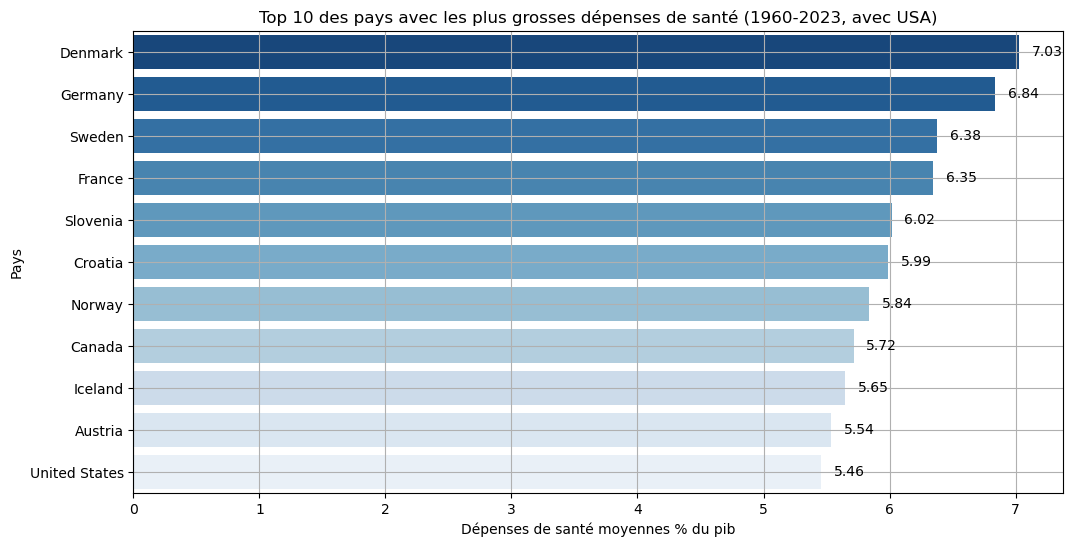

In [112]:


# Vérifier la présence des colonnes nécessaires
if {'Health Expenditure', 'Country', 'Year'}.issubset(df.columns):

    # Filtrer les données de 2010 à 2020
    df_filtered = df[(df["Year"] >= 1960) & (df["Year"] <= 2023)]

    # Calculer la moyenne des dépenses de santé par pays sur cette période
    top_10_countries = df_filtered.groupby("Country")["Health Expenditure"].mean().nlargest(10).reset_index()

    # Ajouter les États-Unis s'ils ne sont pas déjà dans le top 10
    if "United States" not in top_10_countries["Country"].values:
        us_expenditure = df_filtered[df_filtered["Country"] == "United States"]["Health Expenditure"].mean()
        if not pd.isna(us_expenditure):  # Vérifier si les données existent
            us_row = pd.DataFrame({"Country": ["United States"], "Health Expenditure": [us_expenditure]})
            top_10_countries = pd.concat([top_10_countries, us_row]).sort_values(by="Health Expenditure", ascending=False).reset_index(drop=True)

    # Afficher un barplot des pays avec les plus grosses dépenses de santé (y compris les USA) de 2010 à 2020
    plt.figure(figsize=(12, 6))
    sns.barplot(data=top_10_countries, x="Health Expenditure", y="Country", palette="Blues_r")

    # Ajouter les valeurs sur le graphique
    for index, value in enumerate(top_10_countries["Health Expenditure"]):
        plt.text(value + 0.1, index, f"{value:.2f}", va="center")

    # Paramètres du graphique
    plt.xlabel("Dépenses de santé moyennes % du pib")
    plt.ylabel("Pays")
    plt.title("Top 10 des pays avec les plus grosses dépenses de santé (1960-2023, avec USA)")
    plt.grid(True)
    plt.show()


<Figure size 1200x500 with 0 Axes>

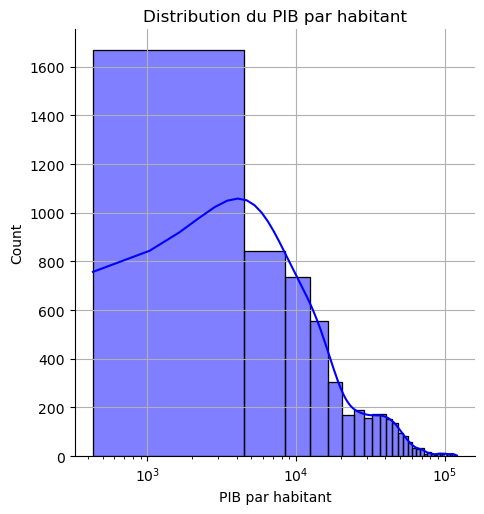

In [113]:
plt.figure(figsize=(12, 5))
sns.displot(df['GDP per Capita'], kde=True, bins=30, color='blue')
plt.xlabel('PIB par habitant')
plt.title('Distribution du PIB par habitant')
plt.xscale('log')
plt.grid()
plt.show()

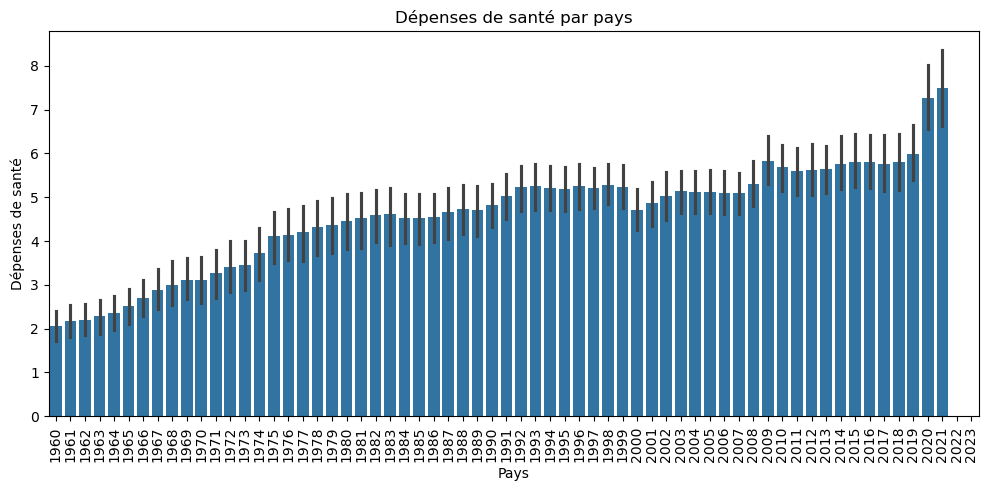

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(x='Year', y='Health Expenditure', data=df)
plt.title("Dépenses de santé par pays")
plt.xlabel("Pays")
plt.ylabel("Dépenses de santé")
plt.xticks(rotation=90)
plt.show()

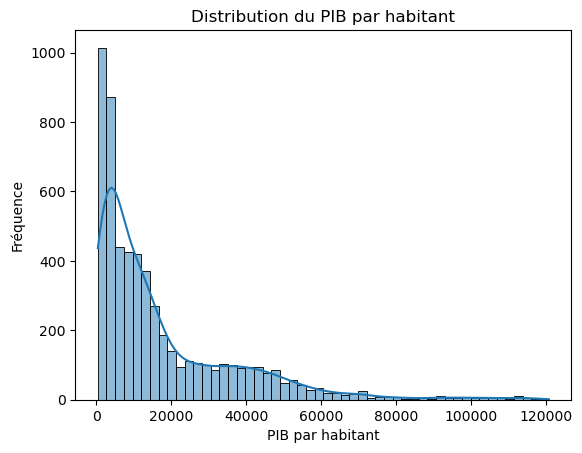

In [ ]:
sns.histplot(df['GDP per Capita'], kde=True)
plt.title("Distribution du PIB par habitant")
plt.xlabel("PIB par habitant")
plt.ylabel("Fréquence")
plt.show()

/var/folders/d5/3pj_jfd14g3bdvwpbbc8wt5r0000gn/T/ipykernel_19583/3546458511.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/d5/3pj_jfd14g3bdvwpbbc8wt5r0000gn/T/ipykernel_19583/3546458511.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




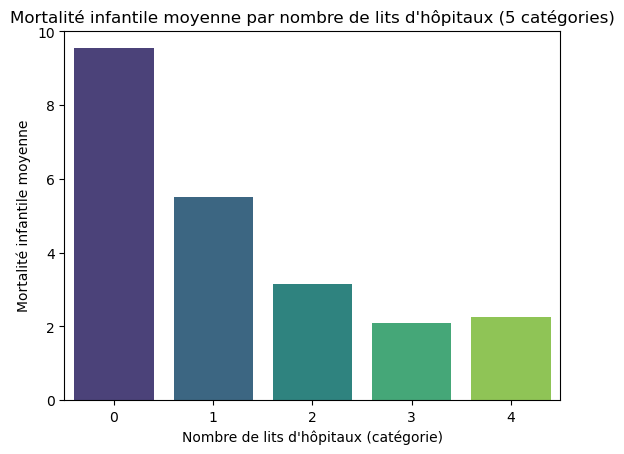

In [126]:


# Créer 5 catégories pour le nombre de lits d'hôpitaux
df['Hospital Beds Category'] = pd.cut(df['Hospital Beds'],
                                      bins=[0, 1, 2, 3, 5, float('inf')],
                                      labels=['0', '1', '2', '3', '4'])

# Calculer la mortalité infantile moyenne par catégorie
grouped_df = df.groupby('Hospital Beds Category')['Child Mortality'].mean().reset_index()

# Bar plot
sns.barplot(x='Hospital Beds Category', y='Child Mortality', data=grouped_df, palette='viridis')
plt.title("Mortalité infantile moyenne par nombre de lits d'hôpitaux (5 catégories)")
plt.xlabel("Nombre de lits d'hôpitaux (catégorie)")
plt.ylabel("Mortalité infantile moyenne")
plt.show()

In [122]:
# Calculer la moyenne par pays
df_avg = df.groupby('Country', as_index=False).mean(numeric_only=True)

import plotly.express as px

# Scatter plot avec les moyennes par pays
fig = px.scatter(df_avg, x='Hospital Beds', y='Child Mortality', color='Country',
                 title="Relation entre le nombre de lits d'hôpitaux et la mortalité infantile (moyenne par pays)",
                 labels={'Hospital Beds': 'Lits d\'hôpitaux (par 1000 habitants)',
                         'Child Mortality': 'Mortalité infantile (pour 1000 naissances)'})
fig.show()

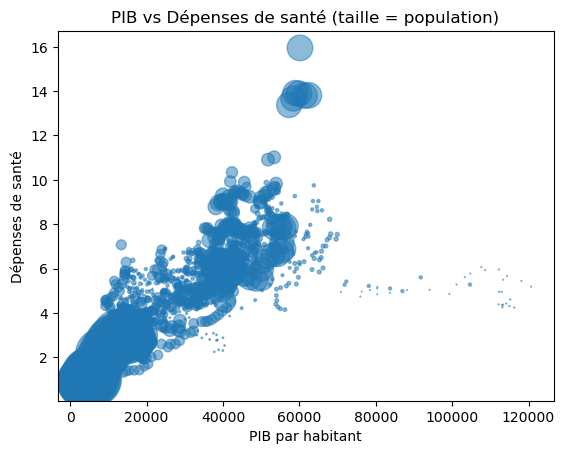

In [ ]:
plt.scatter(df['GDP per Capita'], df['Health Expenditure'], s=df['population']/1e6, alpha=0.5)
plt.title("PIB vs Dépenses de santé (taille = population)")
plt.xlabel("PIB par habitant")
plt.ylabel("Dépenses de santé")
plt.show()

In [ ]:
import plotly.express as px

fig = px.choropleth(df, locations="Country", locationmode='country names',
                     color="Life Expectancy", hover_name="Country",
                     title="Espérance de vie par pays")
fig.show()